# Final Assignment:

## Introduction

Deadline : 03.06.2016 Fri  19:00

* Predict the ratings for unobserved user-movie pairs by developing a recommendation system.

Dataset that will be used is a MovieLens dataset with 10 million entries. the dataset has the following properties:
 * A total of 10000054 ratings.
 * 71567 unique users.
 * 10681 movies.
 * 95580 movie tags.
 * All users have rated at least 20 movies.
 * There are no demographic information about the users.
 
## Data Sets
 
### ratings.dat

 * Each line is a rating of one movie by one user. 
 * Lines are ordered by UserID, then MovieID.
 * Timestamps are seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


** Format: **  

UserID::MovieID::Rating::Timestamp

***Example Data:***

|UserID|MovieID|Rating|Timestamp |
|------|-------|------|----------|
|  1   |  122  |   5  |838985046 |
|  2   |  151  |   3  |868246450 |
|  3   |  110  |  4.5 |1136075500|


### tags.dat

* Each line is a tag applied to a movie by one user.
* Tags are ordered by UserID, then MovieID.
* Timestamps are seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

** Format: **  

UserID::MovieID::Tag::Timestamp

***Example Data:***

|UserID|MovieID|    Tag    |Timestamp |
|------|-------|-----------|----------|
|  15  | 4973  | excellent!|1215184630|
|  20  | 1747  | politics  |1188263867|
|  20  | 1747  | satire    |1188263867|


### movies.dat

* Each line represents a movie.
* Genres are a pipe-separated list, and are selected from the following:

  * Action
  * Adventure
  * Animation
  * Children's
  * Comedy
  * Crime
  * Documentary
  * Drama
  * Fantasy
  * Film-Noir
  * Horror
  * Musical
  * Mystery
  * Romance
  * Sci-Fi
  * Thriller
  * War
  * Western
  
** Format: **  

MovieID::Title::Genres

***Example Data:***

|MovieID|         Title         |                            Genres                              |
|-------|-----------------------|----------------------------------------------------------------|
|   1   |Toy Story (1995)       |Adventure&#124;Animation&#124;Children&#124;Comedy&#124;Fantasy |
|   2   |Jumanji (1995)         |Adventure&#124;Children&#124;Fantasy                            |
|   3   |Grumpier Old Men (1995)|Comedy&#124;Romance                                             |



## Method 1

In [199]:
# Plot diagrams by scaling it onto the page.
%matplotlib inline

# Import necessary libraries.
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import sys


In [200]:
# Import data for movies.
m_cols = ['movie_id', 'title', 'genres']
df_movies = pd.read_csv(u'data/ml-10M100K/movies.dat', sep='::', names=m_cols, engine='python')

df_movies

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [201]:
# Import data for tags.
t_cols = ['user_id', 'movie_id', 'tag', 'timestamp']
df_tags = pd.read_csv(u'data/ml-10M100K/tags.dat', sep='::', names=t_cols, engine='python')

df_tags

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835
5,20,2424,ryan,1188263835
6,20,2947,action,1188263755
7,20,2947,bond,1188263756
8,20,3033,spoof,1188263880
9,20,3033,star wars,1188263880


In [202]:
# Import data for ratings.
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
df_ratings = pd.read_csv(u'data/ml-10M100K/ratings.dat', sep='::', names=r_cols, engine='python')

df_ratings

,user_id,movie_id,rating,timestamp
0,1,122,5,838985046
1,1,185,5,838983525
2,1,231,5,838983392
3,1,292,5,838983421
4,1,316,5,838983392
5,1,329,5,838983392
6,1,355,5,838984474
7,1,356,5,838983653
8,1,362,5,838984885
9,1,364,5,838983707


### Merge datasets for movie-rating and movie-tag pairs:

In [203]:
# Merge the data sets on the id columns.
movietag = pd.merge(df_movies, df_tags, on='movie_id', how='inner')

movierateIn = pd.merge(df_movies, df_ratings, on='movie_id', how='inner')

movierateOut =  pd.merge(df_movies, df_ratings, on='movie_id', how='outer')

In [204]:
#movierateIn['timestamp'] = pd.to_datetime(movierateIn['timestamp'],unit='Y')
movierateIn

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5.0,868254237
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,5.0,876526432
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,33,4.0,849544161
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3.0,981560889
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,35,3.0,1133601653
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,4.0,1049770839


In [205]:
#movierateOut['timestamp'] = pd.to_datetime(movierateOut['timestamp'],unit='s')
movierateOut

,movie_id,title,genres,user_id,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1.0,857911264
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,3.0,1133572007
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.0,1111545931
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,23,5.0,849543482
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,24,5.0,868254237
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,5.0,876526432
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,33,4.0,849544161
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,3.0,981560889
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,35,3.0,1133601653
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,36,4.0,1049770839


In [206]:
#movietag['timestamp'] = pd.to_datetime(movietag['timestamp'],unit='s')
movietag

,movie_id,title,genres,user_id,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1751,Pixar,1137524900
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2030,Pixar,1162989834
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2346,Pixar,1216146311
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2456,animation,1163101260
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2456,Pixar,1163101256
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4697,animated,1140391878
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4697,fun,1140391878
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5002,toy,1190926375
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5002,toys,1190667425
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8043,pixar,1140403371


In [207]:
## Merge a movie's tags 

#import csv

#data = {}

#reader = csv.DictReader(open('data/ml-10M100K/tags.dat','r'),fieldnames=['userid','junk1','movieid','junk2','tag','junk3','timestamp'],delimiter=':')
#for row in reader:
#    if row['movieid'] in data:
#        data[row['movieid']].append(row['tag'])
#    else:
#        data[row['movieid']] = [row['tag']]
#
#writer = open('data/ml-10M100K/tagsMerged.dat','w')
#for key in data:
#    writer.write(key + '::' + '|'.join(data[key]) + '\n')
#writer.close()
#
## Import data for ratings.
#mt_cols = ['movie_id', 'tags']
#df_ratings = pd.read_csv(u'data/ml-10M100K/tagsMerged.dat', sep='::', names=mt_cols, engine='python')

In [208]:
# Calculate date
import time

def calcTime(epochtime):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epochtime))
    
# Find NaN index
def findNanIndex(datafile):
    return pd.isnull(datafile).any(1).nonzero()[0]

# Find nearest data in set
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

### Movies without rating:

In [209]:
# Following are the Movies wihout any rating

NanMovies = movierateOut.loc[findNanIndex(movierateOut)]
NanMovies

,movie_id,title,genres,user_id,rating,timestamp
9547743,25942,Louisiana Story (1948),Drama,NaN,NaN,NaN
9992485,60566,Just Another Love Story (Kærlighed på film) (2...,Crime|Drama|Thriller,NaN,NaN,NaN
9997702,62669,Black River (Kuroi kawa) (1957),Drama,NaN,NaN,NaN
9999924,64959,"Divide and Conquer (Why We Fight, 3) (1943)",Documentary|War,NaN,NaN,NaN


In [210]:
#movierateOut.loc[movierateOut['title'] == ('Toy Story (1995)')]

## Finding possible ratings for unrated movies

### Linear Regression of rating of "Drama" movies against time:

In [211]:
# Movies that contain the genre "Drama"

dramaRate = movierateIn[movierateIn['genres'].str.contains("Drama")]

dramaRate

,movie_id,title,genres,user_id,rating,timestamp
46271,4,Waiting to Exhale (1995),Comedy|Drama|Romance,10,3.0,941544628
46272,4,Waiting to Exhale (1995),Comedy|Drama|Romance,43,1.0,912611414
46273,4,Waiting to Exhale (1995),Comedy|Drama|Romance,65,3.0,970837283
46274,4,Waiting to Exhale (1995),Comedy|Drama|Romance,173,3.0,848491029
46275,4,Waiting to Exhale (1995),Comedy|Drama|Romance,182,4.0,943458784
46276,4,Waiting to Exhale (1995),Comedy|Drama|Romance,295,4.0,981597493
46277,4,Waiting to Exhale (1995),Comedy|Drama|Romance,346,4.0,959911940
46278,4,Waiting to Exhale (1995),Comedy|Drama|Romance,456,1.0,833003592
46279,4,Waiting to Exhale (1995),Comedy|Drama|Romance,494,1.0,844447761
46280,4,Waiting to Exhale (1995),Comedy|Drama|Romance,556,2.0,839005979


In [216]:
# Latest rating recorded for "Drama"

import calendar


latest = dramaRate.timestamp[dramaRate['timestamp'].argmax()]

today = calendar.timegm(time.gmtime())

timeDiff=today-latest

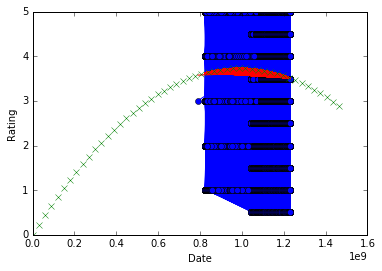

In [217]:
degree = 2

# Following bit of configuration is required since the data is too big.
mpl.rcParams['agg.path.chunksize'] = 10000

x = np.matrix(dramaRate.timestamp[0:]).T
y = np.matrix(dramaRate.rating[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = latest+timeDiff
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x, y, 'o-')
plt.plot(x, f, 'r')
lineDrama = plt.plot(x_2, f_2, 'gx')

plt.xlabel('Date')
plt.ylabel('Rating')

plt.show()


In [218]:
 # It can be seen that the average point that a "Drama" category movie will get now is "3.0".
print('Rating that a Drama movie today will probably have: %s' % (f_2[len(f_2)-1]))

Rating that a Drama movie today will probably have: [[ 2.87607154]]


In [219]:
dramaUsers = dramaRate.user_id.unique()
userAvgs = []

for userIx in range(len(dramaUsers[0:1000])):
    userAvgs.append((dramaUsers[userIx] , dramaRate.loc[dramaRate['user_id'] == dramaUsers[userIx], 'rating'].mean() , dramaRate.loc[dramaRate['user_id'] == dramaUsers[userIx], 'timestamp'].mean()))
    

In [220]:
userAvgs[0]

(10, 3.8761904761904762, 942131221.6761905)

In [221]:
xvalues = lineDrama[0].get_xdata()
yvalues = lineDrama[0].get_ydata()

diverList = []

for userRate in range(len(userAvgs)):
    idx = np.where(xvalues==find_nearest(xvalues,int(round(userAvgs[userRate][2]))))
    diverAvg = yvalues[idx]-userAvgs[userRate][1]
    diverList.append(diverAvg)
    

In [222]:
diverList[0]

matrix([[-0.15017382]])

In [223]:
#predicted = diverList+(f_2[len(f_2)-1])

### Linear Regression of rating of "Crime" movies against time:

In [224]:
# Movies that contain the genre "Crime"

crimeRate = movierateIn[movierateIn['genres'].str.contains("Crime")]

crimeRate

,movie_id,title,genres,user_id,rating,timestamp
55170,6,Heat (1995),Action|Crime|Thriller,8,4.0,1116547028
55171,6,Heat (1995),Action|Crime|Thriller,24,3.0,868254301
55172,6,Heat (1995),Action|Crime|Thriller,33,3.0,849544240
55173,6,Heat (1995),Action|Crime|Thriller,36,5.0,1049770748
55174,6,Heat (1995),Action|Crime|Thriller,57,4.0,868259640
55175,6,Heat (1995),Action|Crime|Thriller,64,3.0,857914274
55176,6,Heat (1995),Action|Crime|Thriller,73,5.0,974298142
55177,6,Heat (1995),Action|Crime|Thriller,90,3.0,857915212
55178,6,Heat (1995),Action|Crime|Thriller,92,4.5,1162164437
55179,6,Heat (1995),Action|Crime|Thriller,96,5.0,959877703


In [225]:
# Latest rating recorded for "Crime"

import calendar


latest = crimeRate.timestamp[crimeRate['timestamp'].argmax()]

today = calendar.timegm(time.gmtime())

timeDiff=today-latest

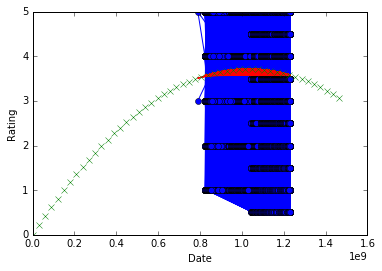

In [226]:
degree = 2

# Following bit of configuration is required since the data is too big.
mpl.rcParams['agg.path.chunksize'] = 10000

x = np.matrix(crimeRate.timestamp[0:]).T
y = np.matrix(crimeRate.rating[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = latest+timeDiff
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x, y, 'o-')
plt.plot(x, f, 'r')
lineCrime = plt.plot(x_2, f_2, 'gx')

plt.xlabel('Date')
plt.ylabel('Rating')

plt.show()

In [227]:
 # It can be seen that the average point that a "Crime" category movie will get now is "3.0".
print('Rating that a Crime movie today will probably have: %s' % (f_2[len(f_2)-1]))

Rating that a Crime movie today will probably have: [[ 3.06247299]]


In [228]:
crimeUsers = crimeRate.user_id.unique()
userAvgs = []

for userIx in range(len(crimeUsers[0:1000])):
    userAvgs.append((crimeUsers[userIx] , crimeRate.loc[crimeRate['user_id'] == crimeUsers[userIx], 'rating'].mean() , crimeRate.loc[crimeRate['user_id'] == crimeUsers[userIx], 'timestamp'].mean()))
    

In [229]:
userAvgs[0]

(8, 3.5362318840579712, 1114881326.2246377)

In [230]:
xvalues = lineCrime[0].get_xdata()
yvalues = lineCrime[0].get_ydata()

diverList = []

for userRate in range(len(userAvgs)):
    idx = np.where(xvalues==find_nearest(xvalues,int(round(userAvgs[userRate][2]))))
    diverAvg = yvalues[idx]-userAvgs[userRate][1]
    diverList.append(diverAvg)

In [231]:
diverList[0]

matrix([[ 0.15951918]])

In [232]:
#predicted = diverList+(f_2[len(f_2)-1])

### Linear Regression of rating of "Thriller" movies against time:

In [233]:
# Movies that contain the genre "Thriller"

thrillerRate = movierateIn[movierateIn['genres'].str.contains("Thriller")]

thrillerRate

,movie_id,title,genres,user_id,rating,timestamp
55170,6,Heat (1995),Action|Crime|Thriller,8,4.0,1116547028
55171,6,Heat (1995),Action|Crime|Thriller,24,3.0,868254301
55172,6,Heat (1995),Action|Crime|Thriller,33,3.0,849544240
55173,6,Heat (1995),Action|Crime|Thriller,36,5.0,1049770748
55174,6,Heat (1995),Action|Crime|Thriller,57,4.0,868259640
55175,6,Heat (1995),Action|Crime|Thriller,64,3.0,857914274
55176,6,Heat (1995),Action|Crime|Thriller,73,5.0,974298142
55177,6,Heat (1995),Action|Crime|Thriller,90,3.0,857915212
55178,6,Heat (1995),Action|Crime|Thriller,92,4.5,1162164437
55179,6,Heat (1995),Action|Crime|Thriller,96,5.0,959877703


In [234]:
# Latest rating recorded for "Thriller"

import calendar


latest = thrillerRate.timestamp[thrillerRate['timestamp'].argmax()]

today = calendar.timegm(time.gmtime())

timeDiff=today-latest

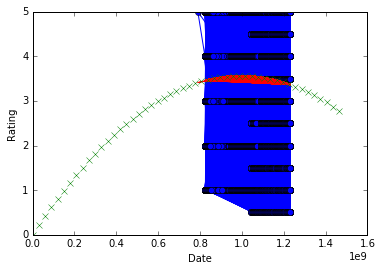

In [235]:
degree = 2

# Following bit of configuration is required since the data is too big.
mpl.rcParams['agg.path.chunksize'] = 10000

x = np.matrix(thrillerRate.timestamp[0:]).T
y = np.matrix(thrillerRate.rating[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = latest+timeDiff
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x, y, 'o-')
plt.plot(x, f, 'r')
lineThriller = plt.plot(x_2, f_2, 'gx')

plt.xlabel('Date')
plt.ylabel('Rating')

plt.show()

In [236]:
 # It can be seen that the average point that a "Thriller" category movie will get now can be rounded up to "3.0".
print('Rating that a Thriller movie today will probably have: %s' % (f_2[len(f_2)-1]))

Rating that a Thriller movie today will probably have: [[ 2.77546174]]


In [237]:
thrillerUsers = thrillerRate.user_id.unique()
userAvgs = []

for userIx in range(len(thrillerUsers[0:1000])):
    userAvgs.append((thrillerUsers[userIx] , thrillerRate.loc[thrillerRate['user_id'] == thrillerUsers[userIx], 'rating'].mean() , thrillerRate.loc[thrillerRate['user_id'] == thrillerUsers[userIx], 'timestamp'].mean()))
    

In [238]:
userAvgs[0]

(8, 3.4944649446494465, 1114321149.4760149)

In [239]:
diverList[0]

matrix([[ 0.15951918]])

In [240]:
#predicted = diverList+(f_2[len(f_2)-1])

### Latest Rating Recorded:

### Linear Regression of rating of "Documentary" movies against time:

In [241]:
# Movies that contain the genre "Documentary"

documentaryRate = movierateIn[movierateIn['genres'].str.contains("Documentary")]

documentaryRate

,movie_id,title,genres,user_id,rating,timestamp
269314,37,Across the Sea of Time (1995),Documentary|IMAX,2760,4.0,948918838
269315,37,Across the Sea of Time (1995),Documentary|IMAX,4761,5.0,1051829924
269316,37,Across the Sea of Time (1995),Documentary|IMAX,5947,2.0,1052625272
269317,37,Across the Sea of Time (1995),Documentary|IMAX,6382,5.0,961787693
269318,37,Across the Sea of Time (1995),Documentary|IMAX,7596,3.0,942340635
269319,37,Across the Sea of Time (1995),Documentary|IMAX,8031,3.0,854479238
269320,37,Across the Sea of Time (1995),Documentary|IMAX,10277,3.0,855442316
269321,37,Across the Sea of Time (1995),Documentary|IMAX,15069,3.0,986352898
269322,37,Across the Sea of Time (1995),Documentary|IMAX,18987,3.0,882377205
269323,37,Across the Sea of Time (1995),Documentary|IMAX,19553,3.0,844192930


In [242]:
# Latest rating recorded for "Documentary"

import calendar


latest = documentaryRate.timestamp[documentaryRate['timestamp'].argmax()]

today = calendar.timegm(time.gmtime())

timeDiff=today-latest

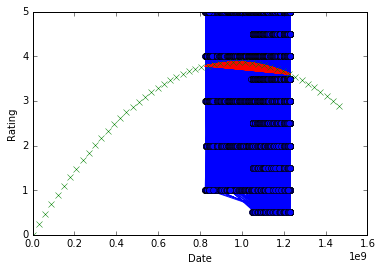

In [243]:
degree = 2

# Following bit of configuration is required since the data is too big.
mpl.rcParams['agg.path.chunksize'] = 10000

x = np.matrix(documentaryRate.timestamp[0:]).T
y = np.matrix(documentaryRate.rating[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = latest+timeDiff
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x, y, 'o-')
plt.plot(x, f, 'r')
lineDocumentary = plt.plot(x_2, f_2, 'gx')

plt.xlabel('Date')
plt.ylabel('Rating')

plt.show()

In [244]:
# It can be seen that the average point that a "Documentary" category movie will get now can be rounded up to "3.0".
print('Rating that a Documentary movie today will probably have: %s' % (f_2[len(f_2)-1]))

Rating that a Documentary movie today will probably have: [[ 2.87976348]]


In [245]:
documentaryUsers = documentaryRate.user_id.unique()
userAvgs = []

for userIx in range(len(documentaryUsers[0:1000])):
    userAvgs.append((documentaryUsers[userIx] , documentaryRate.loc[documentaryRate['user_id'] == documentaryUsers[userIx], 'rating'].mean() , documentaryRate.loc[documentaryRate['user_id'] == documentaryUsers[userIx], 'timestamp'].mean()))
    

In [246]:
xvalues = lineDocumentary[0].get_xdata()
yvalues = lineDocumentary[0].get_ydata()

diverList = []

for userRate in range(len(userAvgs)):
    idx = np.where(xvalues==find_nearest(xvalues,int(round(userAvgs[userRate][2]))))
    diverAvg = yvalues[idx]-userAvgs[userRate][1]
    diverList.append(diverAvg)

In [247]:
diverList[0]

matrix([[-0.63309598]])

In [248]:
#predicted = diverList+(f_2[len(f_2)-1])

### Latest Rating Recorded:

### Linear Regression of rating of "War" movies against time:

In [249]:
# Movies that contain the genre "War"

warRate = movierateIn[movierateIn['genres'].str.contains("War")]

warRate

,movie_id,title,genres,user_id,rating,timestamp
285752,41,Richard III (1995),Drama|War,78,4.5,1097416599
285753,41,Richard III (1995),Drama|War,98,5.0,857915959
285754,41,Richard III (1995),Drama|War,112,4.0,868263409
285755,41,Richard III (1995),Drama|War,121,3.0,945881210
285756,41,Richard III (1995),Drama|War,204,4.0,868273454
285757,41,Richard III (1995),Drama|War,209,4.0,868273886
285758,41,Richard III (1995),Drama|War,215,5.0,975984804
285759,41,Richard III (1995),Drama|War,230,4.0,959898486
285760,41,Richard III (1995),Drama|War,251,4.0,857935043
285761,41,Richard III (1995),Drama|War,252,4.0,946849214


In [250]:
# Latest rating recorded for "War"

import calendar


latest = warRate.timestamp[warRate['timestamp'].argmax()]

today = calendar.timegm(time.gmtime())

timeDiff=today-latest

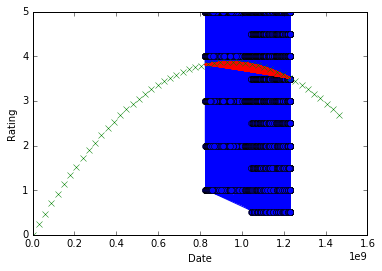

In [251]:
degree = 2

# Following bit of configuration is required since the data is too big.
mpl.rcParams['agg.path.chunksize'] = 10000

x = np.matrix(warRate.timestamp[0:]).T
y = np.matrix(warRate.rating[0:]).T
A = np.hstack((np.power(x,i) for i in range(degree+1)))
toPredict = latest+timeDiff
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)
f = A*w_ls
x_2 = np.matrix(np.linspace(0,toPredict-1)).T
A_2 = np.hstack((np.power(x_2,i) for i in range(degree+1)))
f_2 = A_2*w_ls

plt.plot(x, y, 'o-')
plt.plot(x, f, 'r')
lineWar = plt.plot(x_2, f_2, 'gx')

plt.xlabel('Date')
plt.ylabel('Rating')

plt.show()

In [252]:
# It can be seen that the average point that a "War" category movie will get now can be rounded up to "3.5".
print('Rating that a War movie today will probably have: %s' % (f_2[len(f_2)-1]))

Rating that a War movie today will probably have: [[ 2.68181821]]


In [253]:
warUsers = warRate.user_id.unique()
userAvgs = []

for userIx in range(len(warUsers[0:1000])):
    userAvgs.append((warUsers[userIx] , warRate.loc[warRate['user_id'] == warUsers[userIx], 'rating'].mean() , warRate.loc[warRate['user_id'] == warUsers[userIx], 'timestamp'].mean()))
    

In [254]:
userAvgs[0]

(78, 4.1851851851851851, 1087550877.6111112)

In [255]:
xvalues = lineWar[0].get_xdata()
yvalues = lineWar[0].get_ydata()

diverList = []

for userRate in range(len(userAvgs)):
    idx = np.where(xvalues==find_nearest(xvalues,int(round(userAvgs[userRate][2]))))
    diverAvg = yvalues[idx]-userAvgs[userRate][1]
    diverList.append(diverAvg)

In [256]:
diverList[0]

matrix([[-0.39115938]])

In [257]:
#predicted = diverList+(f_2[len(f_2)-1])